### Find tolerance parameter

Step 10, dt=2.56e-05, Error Estimate=3.333333333333333e-22
Step 20, dt=0.0262144, Error Estimate=5.78141719324102e-13
Step 30, dt=0.04287727662298124, Error Estimate=4.180628520254776e-09
Step 40, dt=0.011501474249141663, Error Estimate=1.121379110738648e-09
Step 50, dt=0.003345352458992086, Error Estimate=3.2724062440595295e-10
Step 60, dt=0.001067942632376079, Error Estimate=1.0481268183863187e-10
Step 70, dt=0.00037187526894870676, Error Estimate=3.6599954306727264e-11
Step 80, dt=0.00013987874594487853, Error Estimate=1.379829791461134e-11
Step 90, dt=5.629837925989276e-05, Error Estimate=5.563809832353518e-12
Step 100, dt=2.404496903520068e-05, Error Estimate=2.3798791761801384e-12
Step 110, dt=1.0821103999928912e-05, Error Estimate=1.0723601782390099e-12
Step 120, dt=5.100947038782391e-06, Error Estimate=5.060197075757827e-13
Step 130, dt=2.505965444192887e-06, Error Estimate=2.4880971286172477e-13
Step 140, dt=1.2775759865554694e-06, Error Estimate=1.269396037692241e-13
Step 150

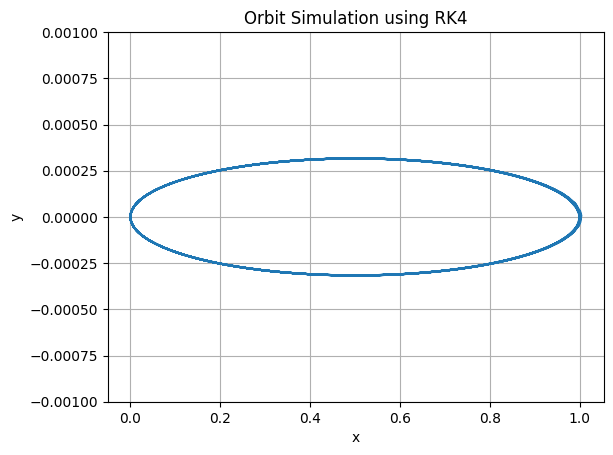

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  4.47213595e-11  0.00000000e+00]
 [ 1.00000000e+00  1.34164079e-10  0.00000000e+00]
 ...
 [-9.99155215e-08  5.81276806e-09  0.00000000e+00]
 [-9.99622581e-08  3.88505291e-09  0.00000000e+00]
 [-9.99904000e-08  1.95879892e-09  0.00000000e+00]]


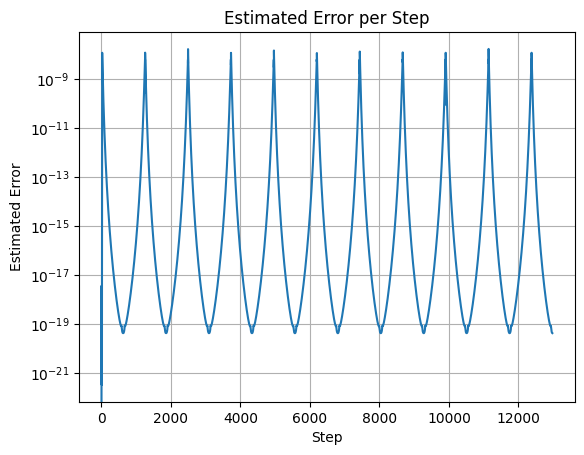

1.0000007015471075e-07


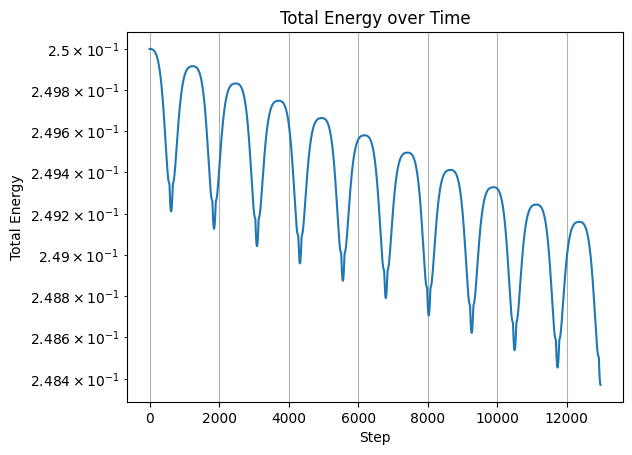

In [28]:
import numpy as np
import matplotlib.pyplot as plt
v_0 = np.sqrt(5) * 1e-4

def acceleration(r,):
    norm = np.linalg.norm(r)
    if norm < 1e-10:  # Add a small threshold to prevent division by zero
        return np.zeros_like(r)
    return -1/norm**3 * np.array(r) / 4
def vel_dispersion(v, A=1, B=1):
    return -A/(np.linalg.norm(v)**3 + B) * np.array(v)

def rk4_step(r, v, dt, alpha_dispersion=0, A=1, B=1):
    k1_v = acceleration(r) + alpha_dispersion * vel_dispersion(v, A, B)
    k1_r = v

    k2_v = acceleration(r + 0.5 * dt * k1_r) + alpha_dispersion * vel_dispersion(v + 0.5 * dt * k1_v, A, B)
    k2_r = v + 0.5 * dt * k1_v

    k3_v = acceleration(r + 0.5 * dt * k2_r) + alpha_dispersion * vel_dispersion(v + 0.5 * dt * k2_v, A, B)
    k3_r = v + 0.5 * dt * k2_v

    k4_v = acceleration(r + dt * k3_r) + alpha_dispersion * vel_dispersion(v + dt * k3_v, A, B)
    k4_r = v + dt * k3_v

    r_next = r + (dt / 6) * (k1_r + 2 * k2_r + 2 * k3_r + k4_r)
    v_next = v + (dt / 6) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)

    return r_next, v_next
def simulate_orbit(r0, v0, dt, tf, tol=1e-7, alpha_dispersion=0, A=1, B=1):
    num_steps = int(tf / dt)
    r = np.zeros((num_steps//2, 3))
    v = np.zeros((num_steps//2, 3))
    err = np.zeros(num_steps//2)
    energy = np.zeros(num_steps//2)
    r[0] = r0
    v[0] = v0
    energy[0] = 0.5 * np.linalg.norm(v0)**2 - 1/(4 * np.linalg.norm(r0))
    t = 0
    i = 1
    while i < num_steps//2:
        r1, v1 = rk4_step(r[i-1], v[i-1], dt, alpha_dispersion, A=A, B=B)
        r1, v1 = rk4_step(r1, v1, dt, alpha_dispersion, A=A, B=B)
        r2, v2 = rk4_step(r[i-1], v[i-1], 2*dt, alpha_dispersion, A=A, B=B)
        norm = np.linalg.norm(r2-r1)
        if norm < 1e-20:  # Add a small threshold to prevent division by zero
            norm = 1e-20
        rho = 30 * dt * tol / norm
        if rho >= 1:
            r[i] = r1
            v[i] = v1
            t += 2  * dt
            err[i] = norm/30
            energy[i] = 0.5 * np.linalg.norm(v[i])**2 - 1/(4 * np.linalg.norm(r[i]))
            i += 1
            if i % 10 == 0:
                print(f"Step {i}, dt={dt}, Error Estimate={err[i-1]}")

        dt = min(dt * rho**(1/4), 2 * dt)
        if np.linalg.norm(r1) <  1e-7:
            break
    return r[:i,:], v[:i,:], err[:i], energy[:i], t

r, v, err, energy, dt = simulate_orbit(np.array([1, 0, 0]), np.array([0, v_0, 0]), 1e-7, 3e-3, alpha_dispersion=0)
print("Timme too  schwarrz:", dt)
plt.plot(r[:, 0], r[:, 1])
plt.ylim(-1e-3, 1e-3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit Simulation using RK4')
# plt.axis('equal')
plt.grid()
plt.show()
print(r)


plt.plot(err)
plt.yscale('log')   
plt.xlabel('Step')
plt.ylabel('Estimated Error')
plt.title('Estimated Error per Step')
plt.grid()
plt.show()

print(min([np.linalg.norm(r[i,:]) for i in range(r.shape[0])]))

plt.plot(abs(energy))
plt.yscale('log')
plt.xlabel('Step')
plt.ylabel('Total Energy')
plt.title('Total Energy over Time')
plt.grid()
plt.show()

### Plot orbit to schwarzchild radius using velocity dispersion

Step 10, dt=2.56e-05, Error Estimate=3.333333333333333e-22
Step 20, dt=0.0262144, Error Estimate=3.4049471723690824e-11
Step 30, dt=0.076619119751787, Error Estimate=6.831175865252232e-09
Step 40, dt=0.07440159917595486, Error Estimate=7.291022052617207e-09
Step 50, dt=0.021988506358007236, Error Estimate=2.156483384568872e-09
Step 60, dt=0.006685042802631813, Error Estimate=6.546606774139686e-10
Step 70, dt=0.0020957749521795677, Error Estimate=2.0550957108348255e-10
Step 80, dt=0.0007038282780120874, Error Estimate=6.919120187998601e-11
Step 90, dt=0.0002550713966703194, Error Estimate=2.5135072549145423e-11
Step 100, dt=9.930752102910825e-05, Error Estimate=9.806022260107899e-12
Step 110, dt=4.1281061405857355e-05, Error Estimate=4.0833664393900986e-12
Step 120, dt=1.822154612717992e-05, Error Estimate=1.8050943821243437e-12
Step 130, dt=8.506170426357601e-06, Error Estimate=8.43751788904583e-13
Step 140, dt=4.1905456384262944e-06, Error Estimate=4.1616245001444215e-13
Step 150, dt=

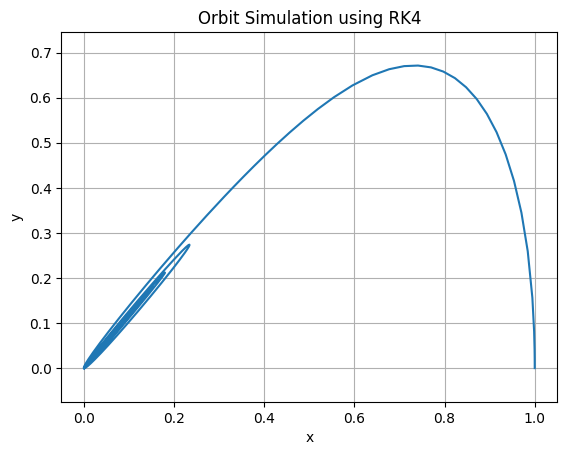

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  1.59999989e-07  0.00000000e+00]
 [ 1.00000000e+00  4.79999905e-07  0.00000000e+00]
 ...
 [-7.03903353e-08 -7.12335044e-08  0.00000000e+00]
 [-6.89577304e-08 -7.25282218e-08  0.00000000e+00]
 [-6.75147596e-08 -7.38072635e-08  0.00000000e+00]]


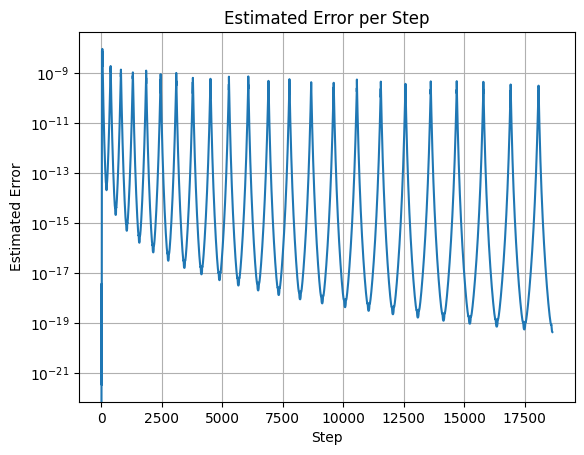

1.0002877040782782e-07


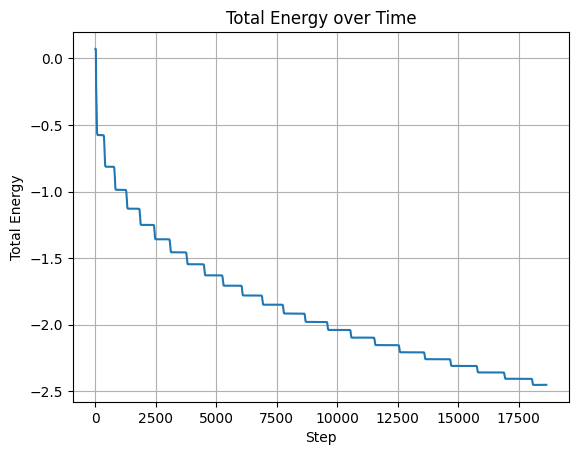

In [30]:
v_0 = .8
r, v, err, energy,  t = simulate_orbit(np.array([1, 0, 0]), np.array([0, v_0, 0]), 1e-7, 1e-2, alpha_dispersion=1, A=1, B=1)
print("time  too  schwarz", t)
plt.plot(r[:, 0], r[:, 1])
# plt.ylim(-1e-3, 1e-3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit Simulation using RK4')
plt.axis('equal')
plt.grid()
plt.show()

print(r)


plt.plot(err)
plt.yscale('log')   
plt.xlabel('Step')
plt.ylabel('Estimated Error')
plt.title('Estimated Error per Step')
plt.grid()
plt.show()

print(min([np.linalg.norm(r[i,:]) for i in range(r.shape[0])]))
plt.plot(energy)
plt.xlabel('Step')
plt.ylabel('Total Energy')
plt.title('Total Energy over Time')
plt.grid()
plt.show()

### Get lenth of time to the schwarzchild radius

### Sweep orbit times over A, B $\epsilon$ [.5,10]

Starting parameter sweep...
[[[ 11.80627559]
  [ 24.01937718]
  [ 35.45220531]
  [ 46.34925871]
  [ 56.89770334]
  [ 67.16746201]
  [ 77.20787052]
  [ 87.07164276]
  [ 96.74663138]
  [106.2863923 ]
  [115.6932111 ]
  [124.96405653]
  [134.12493684]
  [143.19573972]
  [152.1604238 ]
  [161.00170781]
  [169.79336711]
  [178.48189701]
  [187.1052188 ]
  [195.6686049 ]]

 [[  4.79475662]
  [ 11.05931406]
  [ 17.19476984]
  [ 23.02603478]
  [ 28.66136647]
  [ 34.19418795]
  [ 39.58039752]
  [ 44.88892584]
  [ 50.12583695]
  [ 55.2911253 ]
  [ 60.38144783]
  [ 65.39145293]
  [ 70.365424  ]
  [ 75.28958973]
  [ 80.17481351]
  [ 85.00679214]
  [ 89.79430494]
  [ 94.54439222]
  [ 99.26282626]
  [103.93387392]]

 [[  5.56880146]
  [  6.64150823]
  [ 10.77112461]
  [ 14.79088338]
  [ 18.69577163]
  [ 22.49109192]
  [ 26.20626959]
  [ 29.88569534]
  [ 33.52124649]
  [ 37.10586767]
  [ 40.63281537]
  [ 44.12049393]
  [ 47.58151488]
  [ 51.0023406 ]
  [ 54.41420074]
  [ 57.78051987]
  [ 61.10960982]

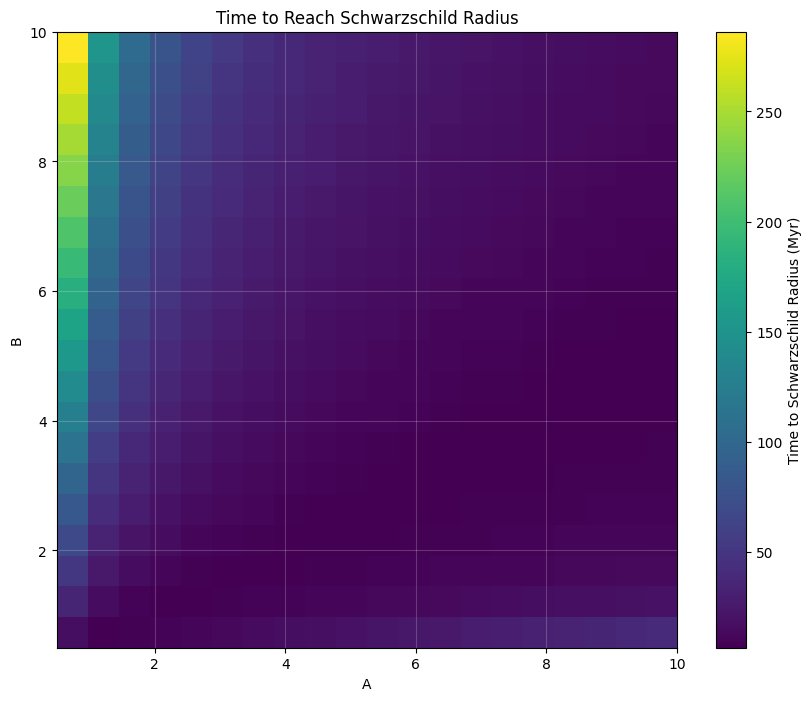

Minimum time: 4.49 Myr
Maximum time: 195.67 Myr
Mean time: 21.05 Myr


In [31]:
import importlib
import mp2
importlib.reload(mp2)

if __name__ == "__main__":
    # Generate 2D heatmap of time to schwarzschild vs A and B
    A_values = np.linspace(0.5, 10, 20)  # Increased resolution
    B_values = np.linspace(0.5, 10, 20)   # Adjusted range and increased resolution

    print("Starting parameter sweep...")
    # Example: use multiprocessing Pool (may need module/script on Windows)
    results = mp2.parameter_sweep(np.array([1.0, 0.0, 0.0]), np.array([0.0, v_0, 0.0]), 
                    dt=1e-7, tf=10, alpha_dispersion=1, 
                    A_values=A_values, B_values=B_values, parallel=True, backend='multiprocessing', max_workers=8, show_progress=False, chunk_size=4)
    print(results)
    results = results[:,:,0]
    print("Parameter sweep complete!")

    # Create the heatmap with improved visualization
    plt.figure(figsize=(10, 8))
    plt.imshow(results.T * 1.46275609357, extent=( A_values[0], A_values[-1], B_values[0], B_values[-1],), 
            aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(label='Time to Schwarzschild Radius (Myr)')
    plt.xlabel('A')
    plt.ylabel('B')
    plt.title('Time to Reach Schwarzschild Radius')

    # Add grid lines
    plt.grid(True, which='both', color='white', linestyle='-', alpha=0.2)
    plt.show()

    # Print some statistics
    print(f"Minimum time: {np.min(results):.2f} Myr")
    print(f"Maximum time: {np.max(results):.2f} Myr")
    print(f"Mean time: {np.mean(results):.2f} Myr")

Starting parameter sweep...
[[[  8.30216233   9.628757    10.2526907   10.75646666  11.06553298
    11.21419259  11.2160654   11.05931406  10.8449432   10.4605938
    10.04705692  10.23165151  13.7165973   19.00737313  27.11588417
    39.64195193  59.10390479  89.43649492 136.72858761 210.3013055 ]]]
Parameter sweep complete!


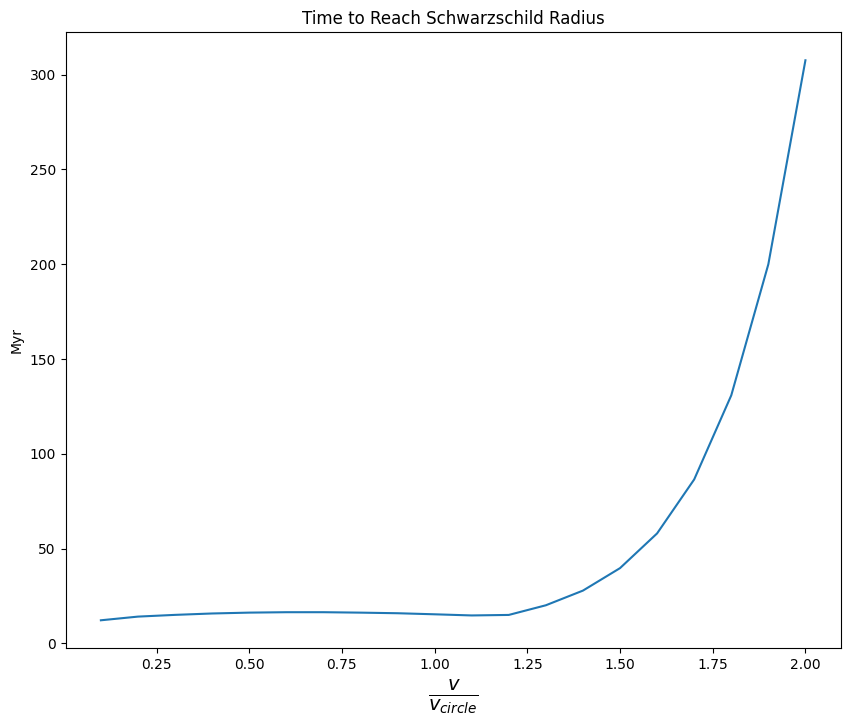

Minimum time: 12.14 Myr
Maximum time: 307.62 Myr
Mean time: 52.67 Myr


In [32]:
import importlib
import mp2
importlib.reload(mp2)


if __name__ == "__main__":
    # Generate 2D heatmap of time to schwarzschild vs A and B
    v0_values = np.zeros((20, 3))
    v0_values[:,1] = np.linspace(.1, 2, 20)   # Adjusted range and increased resolution

    print("Starting parameter sweep...")
    # Example: use multiprocessing Pool (may need module/script on Windows)
    results = mp2.parameter_sweep(np.array([1.0, 0.0, 0.0]), v0_values, 
                    dt=1e-7, tf=10, alpha_dispersion=1, 
                    A_values=None, B_values=None, parallel=True, backend='multiprocessing', max_workers=8, show_progress=False, chunk_size=4)
    print(results)
    print("Parameter sweep complete!")
    results = results[0,0,:] * 1.46275609357
    # Create the heatmap with improved visualization
    plt.figure(figsize=(10, 8))
    plt.plot(v0_values[:,1], results)
    plt.ylabel('Myr')
    plt.xlabel(r'$\frac{v}{v_{circle}}$', fontsize=20)
    plt.title('Time to Reach Schwarzschild Radius')

    # Add grid lines
    plt.grid(True, which='both', color='white', linestyle='-', alpha=0.2)
    plt.show()

    # Print some statistics
    print(f"Minimum time: {np.min(results):.2f} Myr")
    print(f"Maximum time: {np.max(results):.2f} Myr")
    print(f"Mean time: {np.mean(results):.2f} Myr")